In [1]:
import csv
from loaders import read_data
from helpers import display_rows, count

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your Goal

Find the top 3 movies of all time, and convince someone why they're the top 3. These rankings should reflect, to some extent, artistry, popular appeal, and success. You might have to look at the data and think about quality in a few different ways to make a compelling case. You should consider including visuals and tables to make your case.

Use any libraries you'd like, but don't feel the need to use libraries if something simple will do. We've already loaded `pd` for R-style data manipulation, `plt` for making graphs, and `np` for more complex statistics.

# Starter Code

## Loading the data

Here is the data as a list of dictionaries...

In [2]:
movies = read_data('input/350k_movies_themoviedb.csv', encoding="latin1")

Or, if you feel more comfortable using Pandas dataframes...

In [3]:
movies_df = pd.DataFrame.from_records(movies)

## Manipulating data

Compute common descriptive statistics like min, max, average, and standard deviation like so:

In [4]:
revenues = [m['revenue'] for m in movies]
min_revenue = min(revenues)
max_revenue = max(revenues)
avg_revenue = np.mean(revenues)
stddev_revenue = np.std(revenues)
print("Min revenue:", min_revenue, "Max revenue:", max_revenue, "Avg revenue:", avg_revenue, "Stddev revenue:", stddev_revenue)

Min revenue: -12.0 Max revenue: 2781505847.0 Avg revenue: 1533838.119567596 Stddev revenue: 24018873.924453795


And sort the data with the `sorted` function

In [5]:
sorted_movies = sorted(movies, key=lambda m: m['revenue'], reverse=True)
print("Movies with top revenue:", [m['title'] for m in sorted_movies][:5])

Movies with top revenue: ['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers', 'Jurassic World']


## Viewing the data

### Tabular data

It might be helpful to use the `display_rows` helper function to show some of the data

In [6]:
display_rows(movies, 2, hide=['overview'])

budget,genres,original_language,original_title,production_companies,production_countries,revenue,spoken_languages,tagline,title,vote_average,vote_count,spoken_languages_number,runtime,popularity,release_day,release_month,release_year
0,"['Drama', 'Crime']",fi,Ariel,Villealfa Filmproduction Oy,Finland,0,suomi,,Ariel,7.1,40,2,69,0.823904,10,21,1988
0,"['Drama', 'Comedy']",fi,Varjoja paratiisissa,Villealfa Filmproduction Oy,Finland,0,English,,Shadows in Paradise,7,32,3,76,0.47445,10,16,1986


### Categorical data

You can use the `count` helper with `barplot` to plot categorical data

<BarContainer object of 144 artists>

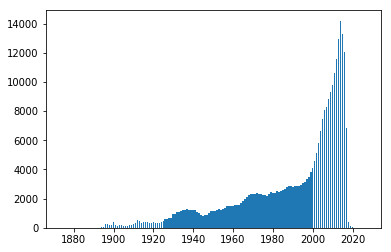

In [7]:
years, counts = count([m['release_year'] for m in movies])
plt.bar(years, counts)

### Numerical data

You can use the `hist` method on plt...

(array([3.28609e+05, 2.96000e+02, 8.30000e+01, 4.00000e+01, 9.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.20000000e+01,  2.78150574e+08,  5.56301160e+08,  8.34451746e+08,
         1.11260233e+09,  1.39075292e+09,  1.66890350e+09,  1.94705409e+09,
         2.22520468e+09,  2.50335526e+09,  2.78150585e+09]),
 <a list of 10 Patch objects>)

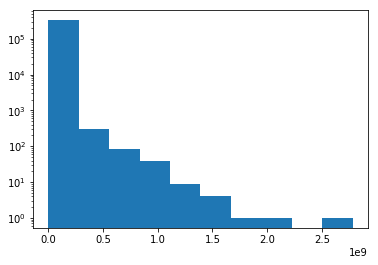

In [8]:
revenues = [m['revenue'] for m in movies if m != 0]
plt.hist(revenues, bins=10, log=True)

Or `boxplot`...

{'whiskers': [<matplotlib.lines.Line2D at 0x12b2e3438>,
 'caps': [<matplotlib.lines.Line2D at 0x12b2e3cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b2e32e8>],
 'medians': [<matplotlib.lines.Line2D at 0x12b580588>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b5809b0>],
 'means': []}

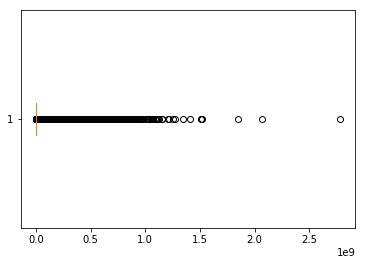

In [9]:
plt.boxplot(revenues, vert=False)